In [ ]:
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
import pandas as pd


In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
y_train=df['SalePrice']
# df.drop(['SalePrice'],axis=1, inplace=True)
nTrain=df.shape[0]
nTest=test.shape[0]
dataset=pd.concat((df,test)).reset_index(drop=True)
print(dataset.shape)
dataset.head()
df=dataset

(2919, 81)


In [ ]:
df['LotFrontage'].fillna(df.groupby(['LotShape'])['LotFrontage'].transform('mean'), inplace=True)
df.Alley.fillna('none', inplace=True)
df.BsmtQual.fillna('none', inplace=True)
df.BsmtCond.fillna('none', inplace=True)
df.BsmtCond.fillna('none', inplace=True)
df.BsmtExposure.fillna('none', inplace=True)
df.BsmtFinType1.fillna('none', inplace=True)
df.BsmtFinType2.fillna('none', inplace=True)
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)
df.MSZoning.fillna(df.MSZoning.mode()[0], inplace=True)
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)
df.Exterior2nd.fillna(df.Exterior2nd.mode()[0], inplace=True)
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)
df.Functional.fillna(df.Functional.mode()[0], inplace=True)
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)
df.FireplaceQu.fillna('none', inplace=True)
df.GarageFinish.fillna('none', inplace=True)
df.GarageYrBlt.fillna(0, inplace=True)
df.GarageType.fillna('none', inplace=True)
df.GarageCond.fillna('none', inplace=True)
df.GarageQual.fillna('none', inplace=True)
df.MiscFeature.fillna('none', inplace=True)
df.MasVnrType.fillna('none', inplace=True)
df.Fence.fillna('none', inplace=True)
df.PoolQC.fillna('none', inplace=True)
df.MasVnrArea.fillna(0,inplace=True)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col].fillna(0, inplace=True)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
df.drop(['Utilities'], axis=1,inplace=True)



<Axes: >

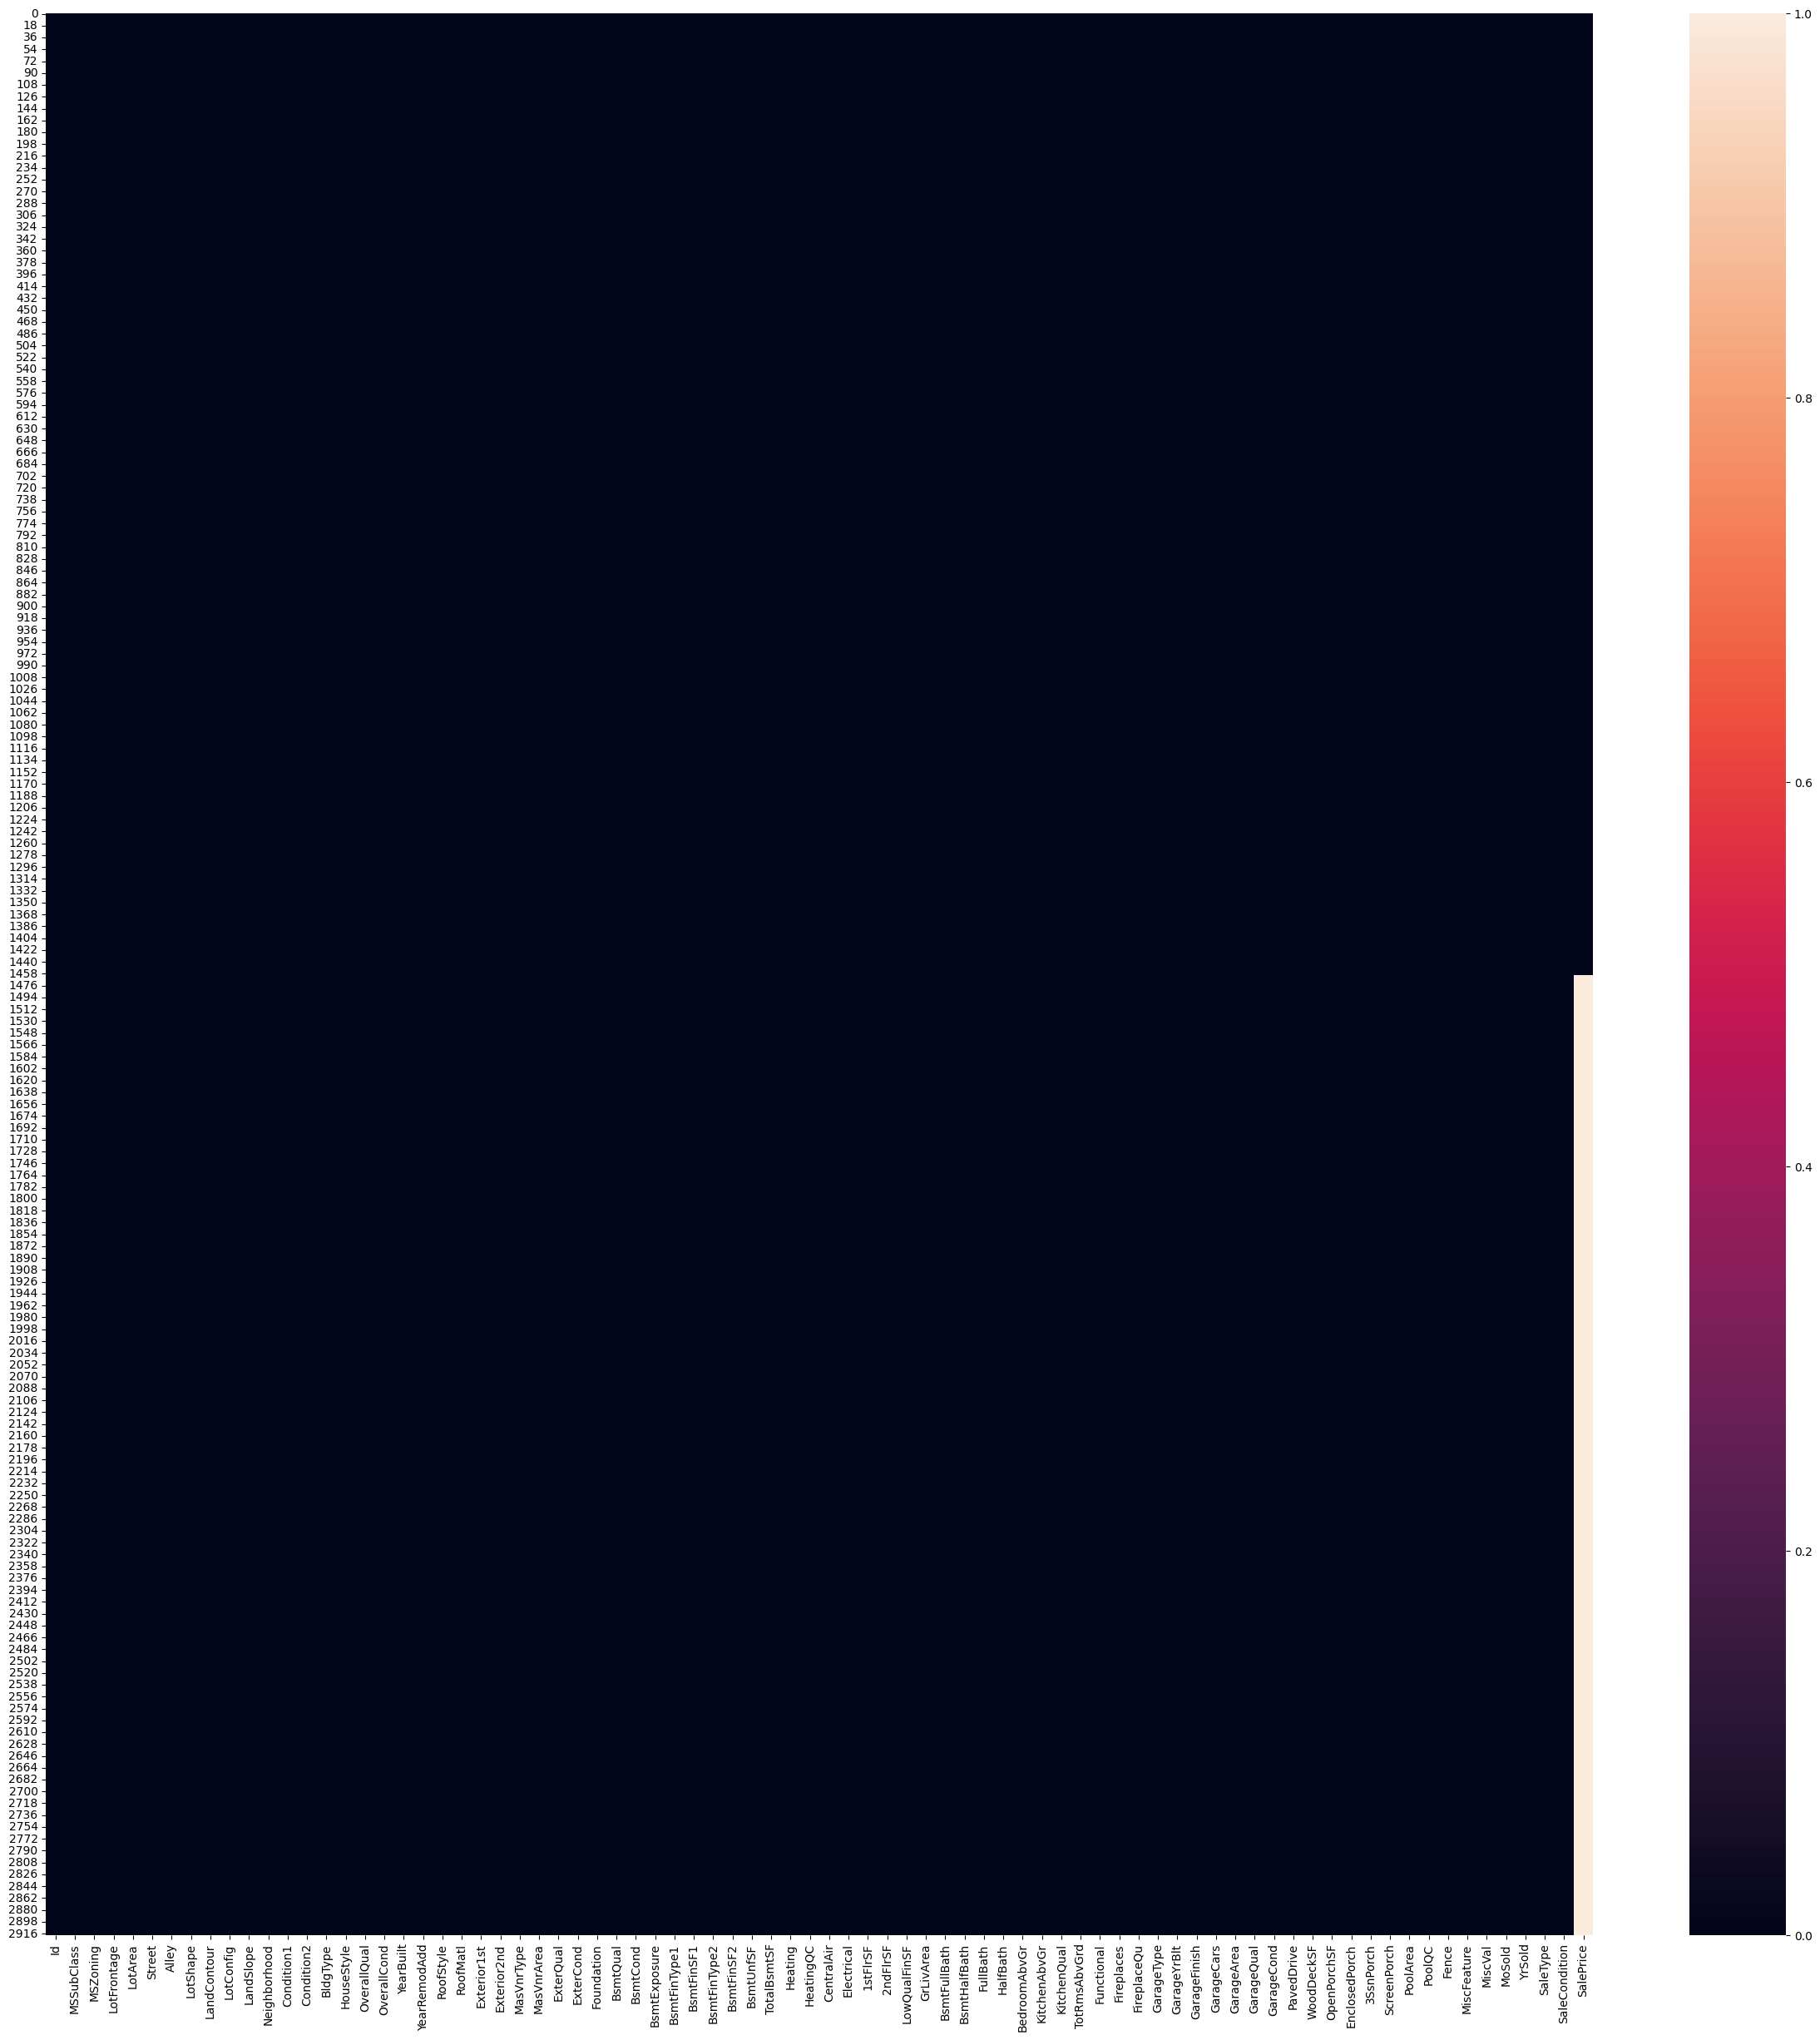

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(df.isnull())

In [ ]:
x_train=df[:nTrain]
x_test=df[nTrain:]

In [ ]:
type(x_train)
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,Inside,...,0,none,none,none,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,FR2,...,0,none,none,none,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,Inside,...,0,none,none,none,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,Corner,...,0,none,none,none,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,FR2,...,0,none,none,none,0,12,2008,WD,Normal,250000.0


In [ ]:
!pip install sklearn
from sklearn.model_selection import train_test_split

In [ ]:
y_train.shape

(1095,)

In [ ]:
import tensorflow_decision_forests as tfdf
import pandas as pd

dataset = pd.read_csv("iris.csv")
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(x_train, label="SalePrice", task= tfdf.keras.Task.REGRESSION)



In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

Use /tmp/tmpo58d3jdr as temporary training directory


In [ ]:
rf.fit(tf_dataset)


Reading training dataset...
Training dataset read in 0:00:00.988793. Found 1460 examples.
Training model...
Model trained in 0:00:06.137597
Compiling model...
Model compiled.


In [ ]:
type(x_test)

pandas.core.frame.DataFrame

In [ ]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    x_test,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': x_test.Id,
                       'SalePrice': preds.squeeze()})
output.head()


2/2 [==============================] - 1s 37ms/step


,Id,SalePrice
1460,1461,126478.007812
1461,1462,153399.546875
1462,1463,181639.906250
1463,1464,183766.812500
1464,1465,195657.171875


In [ ]:
output.to_csv('submission1.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>